<a href="https://colab.research.google.com/github/kengrsls/PUBH-NHIS-Project/blob/main/nhis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install packages if not already installed (uncomment if needed)
# install.packages("tidyverse")
# install.packages("broom")
# install.packages("knitr")

# Load required libraries
library(tidyverse)
library(broom)
library(knitr)

# Load the dataset (ensure "child22.csv" is in your working directory)
data <- read.csv("child22.csv", stringsAsFactors = FALSE)

# Convert variables to appropriate data types:
# Outcome variable: convert VSLPA_C to a factor with meaningful labels
data$VSLPA_C <- factor(data$VSLPA_C, levels = c(1,2), labels = c("Yes", "No"))

# Predictor: Food insecurity (FDSCAT3_C) assumed to be categorical
data$FDSCAT3_C <- factor(data$FDSCAT3_C)

# Predictor: Income from wages (INCWRKO_C) as a numeric variable
data$INCWRKO_C <- as.numeric(data$INCWRKO_C)

# Predictor: Ethnicity (HISP_C) coded as 1 = Yes, 2 = No
data$HISP_C <- factor(data$HISP_C, levels = c(1,2), labels = c("Hispanic", "Non-Hispanic"))

# Run logistic regression: predicting receipt of ST therapy services (VSLPA_C)
# from food insecurity, income, and ethnicity
model <- glm(VSLPA_C ~ FDSCAT3_C + INCWRKO_C + HISP_C, data = data, family = binomial)

# Display a summary of the model
summary(model)

# Tidy the model output, exponentiating coefficients to yield odds ratios,
# and including confidence intervals
tidy_model <- broom::tidy(model, exponentiate = TRUE, conf.int = TRUE)

# View the tidy model results
print(tidy_model)

# Create a nicely formatted table using knitr::kable
kable(tidy_model, digits = 3, caption = "Logistic Regression Results: Predicting Receipt of ST Therapy Services")



Call:
glm(formula = VSLPA_C ~ FDSCAT3_C + INCWRKO_C + HISP_C, family = binomial, 
    data = data)

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)   
(Intercept)         0.84712    0.28624   2.959  0.00308 **
FDSCAT3_C2          0.33755    0.30217   1.117  0.26396   
FDSCAT3_C3         -0.11222    0.28186  -0.398  0.69053   
FDSCAT3_C8          0.40326    1.99524   0.202  0.83983   
INCWRKO_C          -0.23781    0.22705  -1.047  0.29493   
HISP_CNon-Hispanic -0.06179    0.17613  -0.351  0.72571   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 971.13  on 739  degrees of freedom
Residual deviance: 967.11  on 734  degrees of freedom
  (6724 observations deleted due to missingness)
AIC: 979.11

Number of Fisher Scoring iterations: 4


# A tibble: 6 × 7
  term               estimate std.error statistic p.value conf.low conf.high
  <chr>                 <dbl>     <dbl>     <dbl>   <dbl>    <dbl>     <dbl>
1 (Intercept)           2.33      0.286     2.96  0.00308   1.34        4.20
2 FDSCAT3_C2            1.40      0.302     1.12  0.264     0.788       2.60
3 FDSCAT3_C3            0.894     0.282    -0.398 0.691     0.518       1.57
4 FDSCAT3_C8            1.50      2.00      0.202 0.840     0.0242     82.8 
5 INCWRKO_C             0.788     0.227    -1.05  0.295     0.488       1.22
6 HISP_CNon-Hispanic    0.940     0.176    -0.351 0.726     0.664       1.32




Table: Logistic Regression Results: Predicting Receipt of ST Therapy Services

|term               | estimate| std.error| statistic| p.value| conf.low| conf.high|
|:------------------|--------:|---------:|---------:|-------:|--------:|---------:|
|(Intercept)        |    2.333|     0.286|     2.959|   0.003|    1.343|     4.203|
|FDSCAT3_C2         |    1.402|     0.302|     1.117|   0.264|    0.788|     2.595|
|FDSCAT3_C3         |    0.894|     0.282|    -0.398|   0.691|    0.518|     1.571|
|FDSCAT3_C8         |    1.497|     1.995|     0.202|   0.840|    0.024|    82.760|
|INCWRKO_C          |    0.788|     0.227|    -1.047|   0.295|    0.488|     1.224|
|HISP_CNon-Hispanic |    0.940|     0.176|    -0.351|   0.726|    0.664|     1.325|

In [ ]:
# Install and load required packages if needed
# install.packages("tidyverse")
library(tidyverse)

# Load the dataset (ensure "child22.csv" is in your working directory)
data <- read.csv("child22.csv", stringsAsFactors = FALSE)

# Recode and rename variables with descriptive names:
data <- data %>%
  # Rename the original columns for clarity
  rename(FoodInsecurity_Orig = FDSCAT3_C,
         FoodAccessDifficulty_Orig = FDSCAT4_C,
         Income_Wages_Orig = INCWRKO_C,
         Ethnicity_Orig = HISP_C,
         ST_Therapy_Orig = VSLPA_C) %>%
  # Create new recoded variables with descriptive names
  mutate(
    # Recode Food Insecurity (assumed original coding: 1=high, 2=moderate, 3=mild, 4=none)
    FoodInsecurity = factor(FoodInsecurity_Orig,
                            levels = c(1, 2, 3, 4),
                            labels = c("High Food Insecurity",
                                       "Moderate Food Insecurity",
                                       "Mild Food Insecurity",
                                       "No Food Insecurity")),
    # Recode Food Access Difficulty (assumed original coding: 1=Very Difficult, 2=Somewhat Difficult, 3=Not Very Difficult, 4=Not At All Difficult)
    FoodAccessDifficulty = factor(FoodAccessDifficulty_Orig,
                                  levels = c(1, 2, 3, 4),
                                  labels = c("Very Difficult",
                                             "Somewhat Difficult",
                                             "Not Very Difficult",
                                             "Not At All Difficult")),
    # Convert Income from Wages to numeric and recode into income groups
    Income_Wages = as.numeric(Income_Wages_Orig),
    Income_Group = cut(Income_Wages,
                       breaks = c(0, 20000, 40000, 60000, Inf),
                       labels = c("Low Income",
                                  "Lower-Middle Income",
                                  "Upper-Middle Income",
                                  "High Income"),
                       right = FALSE),
    # Recode Ethnicity (assumed coding: 1 = Hispanic, 2 = Non-Hispanic)
    Ethnicity = factor(Ethnicity_Orig,
                       levels = c(1, 2),
                       labels = c("Hispanic", "Non-Hispanic")),
    # Recode ST Therapy Services (assumed coding: 1 = Yes, 2 = No)
    ST_Therapy = factor(ST_Therapy_Orig,
                        levels = c(1, 2),
                        labels = c("Received ST Therapy", "Did Not Receive ST Therapy"))
  )

# Optional: check summaries of the new recoded variables
summary(data$FoodInsecurity)
summary(data$FoodAccessDifficulty)
summary(data$Income_Group)
summary(data$Ethnicity)
summary(data$ST_Therapy)


High Food Insecurity Moderate Food Insecurity     Mild Food Insecurity 
                    6624                      416                      263 
      No Food Insecurity                     NA's 
                       0                      161

Very Difficult   Somewhat Difficult   Not Very Difficult 
                6039                  585                  416 
Not At All Difficult                 NA's 
                 263                  161

Low Income Lower-Middle Income Upper-Middle Income         High Income 
               7464                   0                   0                   0

Hispanic Non-Hispanic 
        1967         5497

Received ST Therapy Did Not Receive ST Therapy 
                       270                        470 
                      NA's 
                      6724

In [ ]:
# Load required library
library(tidyverse)

# Load your dataset (ensure "child22.csv" is uploaded to your working directory)
data <- read.csv("child22.csv", stringsAsFactors = FALSE)

# Rename original variables for clarity and create new recoded variables
data <- data %>%
  # Rename original columns (keeping the originals for reference)
  rename(
    FoodInsecurity_Orig = FDSCAT3_C,
    FoodAccessDifficulty_Orig = FDSCAT4_C,
    Income_Wages_Orig = INCWRKO_C,
    Ethnicity_Orig = HISP_C,
    ST_Therapy_Orig = VSLPA_C
  ) %>%
  mutate(
    # Recode Food Insecurity: assuming original coding is 1=High, 2=Moderate, 3=Mild, 4=None
    FoodInsecurity = factor(FoodInsecurity_Orig,
                            levels = c(1, 2, 3, 4),
                            labels = c("High Food Insecurity",
                                       "Moderate Food Insecurity",
                                       "Mild Food Insecurity",
                                       "No Food Insecurity")),
    # Recode Food Access Difficulty: assuming original coding is 1=Very Difficult, 2=Somewhat Difficult, 3=Not Very Difficult, 4=Not At All Difficult
    FoodAccessDifficulty = factor(FoodAccessDifficulty_Orig,
                                  levels = c(1, 2, 3, 4),
                                  labels = c("Very Difficult",
                                             "Somewhat Difficult",
                                             "Not Very Difficult",
                                             "Not At All Difficult")),
    # Convert Income from Wages to numeric (if not already) and recode into income groups
    Income_Wages = as.numeric(Income_Wages_Orig),
    Income_Group = cut(Income_Wages,
                       breaks = c(0, 20000, 40000, 60000, Inf),
                       labels = c("Low Income",
                                  "Lower-Middle Income",
                                  "Upper-Middle Income",
                                  "High Income"),
                       right = FALSE),
    # Recode Ethnicity: original coding 1 = Hispanic, 2 = Non-Hispanic
    Ethnicity = factor(Ethnicity_Orig,
                       levels = c(1, 2),
                       labels = c("Hispanic", "Non-Hispanic")),
    # Recode ST Therapy Services: original coding 1 = Yes, 2 = No
    ST_Therapy = factor(ST_Therapy_Orig,
                        levels = c(1, 2),
                        labels = c("Received ST Therapy", "Did Not Receive ST Therapy"))
  )

# Optional: Print summaries to verify recoding
summary(data$FoodInsecurity)
summary(data$FoodAccessDifficulty)
summary(data$Income_Group)
summary(data$Ethnicity)
summary(data$ST_Therapy)


High Food Insecurity Moderate Food Insecurity     Mild Food Insecurity 
                    6624                      416                      263 
      No Food Insecurity                     NA's 
                       0                      161

Very Difficult   Somewhat Difficult   Not Very Difficult 
                6039                  585                  416 
Not At All Difficult                 NA's 
                 263                  161

Low Income Lower-Middle Income Upper-Middle Income         High Income 
               7464                   0                   0                   0

Hispanic Non-Hispanic 
        1967         5497

Received ST Therapy Did Not Receive ST Therapy 
                       270                        470 
                      NA's 
                      6724

In [ ]:
write.csv(data, file = "child22recoded.csv", row.names = FALSE)


In [ ]:
import csv

ERROR: Error in parse(text = input): <text>:1:8: unexpected symbol
1: import csv
           ^


In [ ]:
with open('child22.csv', 'r') as file:
  reader = csv.reader(file)
  # Process the data here

ERROR: Error in parse(text = input): <text>:1:6: unexpected symbol
1: with open
         ^


In [ ]:
import csv

with open('child22.csv', 'r') as file:
    reader = csv.reader(file)
    # Process the data here

    # Example: Print the first row
    for row in reader:
        print(row)
        break  # Stop after printing the first row

ERROR: Error in parse(text = input): <text>:1:8: unexpected symbol
1: import csv
           ^


In [ ]:
# Install the readr package if you haven't already
if (!require("readr")) {
  install.packages("readr")
}

# Load the readr library
library(readr)

# Read the CSV file
df <- read_csv("child22.csv")

# Process the data here
# Example: print the first 5 rows
print(head(df, 5))

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 7464 Columns: 432
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): HHX
dbl (423): URBRRL, RATCAT_C, INCTCFLG_C, IMPINCFLG_C, PPSU, PSTRAT, HISPALLP...
lgl   (8): OGFLGR_C, OGHDHPR_C, OPFLG_C, CHFLG_C, MAFLG_C, PRPLCOV2_C, EQWLK...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 5 × 432
  URBRRL RATCAT_C INCTCFLG_C IMPINCFLG_C  PPSU PSTRAT HISPALLP_C RACEALLP_C
   <dbl>    <dbl>      <dbl>       <dbl> <dbl>  <dbl>      <dbl>      <dbl>
1      1       14          1           0     2    115          2          1
2      4        4          0           0     3    122          2          1
3      3       11          0           0     1    103          3          2
4      3       13          0           0     4    103          3          2
5      3        2          0           0     2    103          3          2
# ℹ 424 more variables: SDQIMPTOT_C <dbl>, SDQTOT_C <dbl>, SDQPROS_C <dbl>,
#   SDQPEER_C <dbl>, SDQHYPE_C <dbl>, SDQCOND_C <dbl>, SDQEMOT_C <dbl>,
#   SCHDYMSSTC_C <dbl>, AFNOW <dbl>, YRSINUS_C <dbl>, CITZNSTP_C <dbl>,
#   HHRESPSC_FLG <dbl>, PCNTADTWFP_C <dbl>, PCNTADTWKP_C <dbl>,
#   FDSCAT4_C <dbl>, FDSCAT3_C <dbl>, RELTIVP_C <dbl>, URGNT12MTC_C <dbl>,
#   EMERG12MTC_C <dbl>, PCNT18UPTC <dbl>, PCNTLT18TC <dbl>, PCNTPARNTS_C <dbl>,
#   PARWK

In [ ]:
dim(df)

[1] 7464  432

In [ ]:
install.packages("summarytools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘magick’


Warning message in install.packages("summarytools"):
“installation of package ‘magick’ had non-zero exit status”
Warning message in install.packages("summarytools"):
“installation of package ‘summarytools’ had non-zero exit status”


Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha




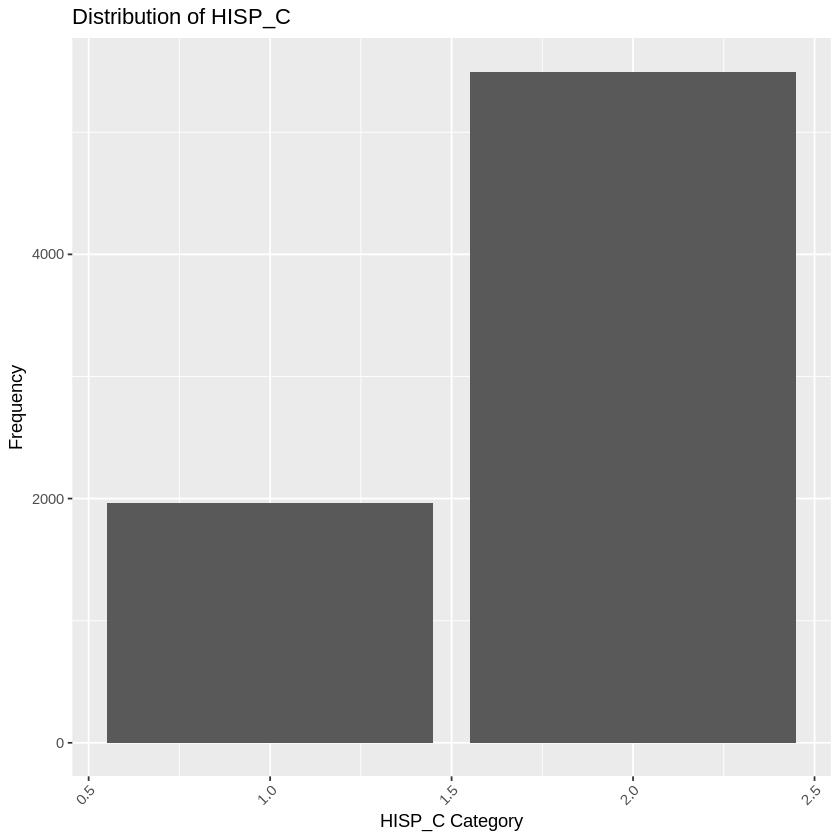

In [ ]:
# Install and load necessary packages
if (!require("ggplot2")) install.packages("ggplot2")
library(ggplot2)

# Assuming 'df' is your data frame and 'HISP_C' is a categorical variable
ggplot(df, aes(x = HISP_C)) +
  geom_bar() +  # Creates the bar graph
  labs(title = "Distribution of HISP_C",  # Adds a title
       x = "HISP_C Category",  # Labels the x-axis
       y = "Frequency") +  # Labels the y-axis
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotates x-axis labels for better readability

In [ ]:
# Recode HISP_C and rename to Hispanic_r
df$Hispanic_r <- ifelse(df$HISP_C == 1, 0, ifelse(df$HISP_C == 2, 1, df$HISP_C))

# Print the first few rows to verify the changes
head(df)

URBRRL,RATCAT_C,INCTCFLG_C,IMPINCFLG_C,PPSU,PSTRAT,HISPALLP_C,RACEALLP_C,SDQIMPTOT_C,SDQTOT_C,⋯,HHSTAT_C,INTV_MON,RECTYPE,IMPNUM_C,RELCHPARENTP1_C,RELCHPARENTP2_C,WTFA_C,HHX,POVRATTC_C,Hispanic_r
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,14,1,0,2,115,2,1,NA,2,⋯,1,1,20,1,1,1,19296.837,H053192,11.00,1
4,4,0,0,3,122,2,1,NA,3,⋯,1,1,20,1,1,4,19620.702,H040577,1.07,1
3,11,0,0,1,103,3,2,NA,NA,⋯,1,1,20,1,1,4,8284.925,H033338,3.66,1
3,13,0,0,4,103,3,2,2,15,⋯,1,1,20,1,1,4,10907.508,H028319,4.55,1
3,2,0,0,2,103,3,2,0,8,⋯,1,1,20,1,1,4,24148.818,H001424,0.56,1
3,14,0,0,1,111,2,1,NA,6,⋯,1,1,20,1,1,1,2294.606,H004139,6.18,1


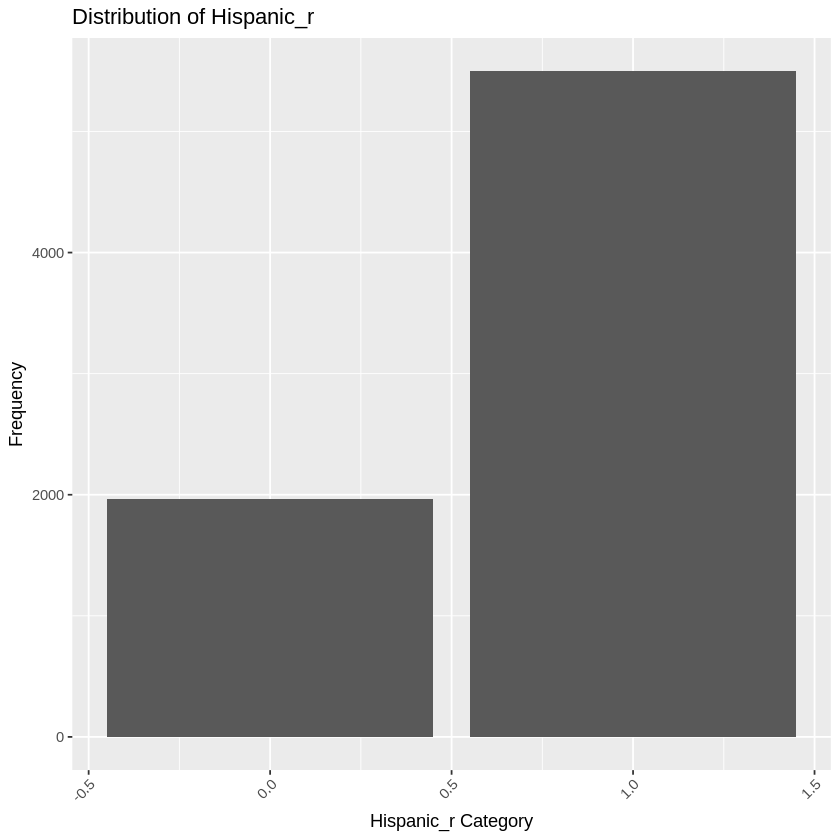

In [ ]:
# Install and load necessary packages
if (!require("ggplot2")) install.packages("ggplot2")
library(ggplot2)

# Assuming 'df' is your data frame and 'Hispanic_r' is the recoded variable
ggplot(df, aes(x = Hispanic_r)) +
  geom_bar() +  # Creates the bar graph
  labs(title = "Distribution of Hispanic_r",  # Adds a title
       x = "Hispanic_r Category",  # Labels the x-axis
       y = "Frequency") +  # Labels the y-axis
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotates x-axis labels (optional)

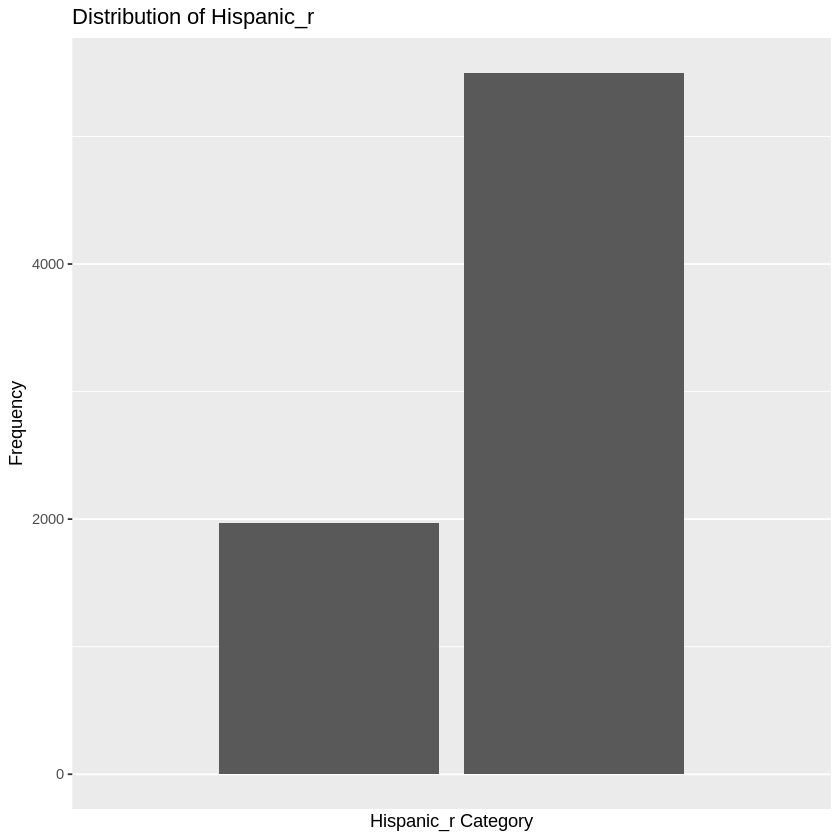

In [ ]:
# Install and load necessary packages
if (!require("ggplot2")) install.packages("ggplot2")
library(ggplot2)

# Assuming 'df' is your data frame and 'Hispanic_r' is the recoded variable
ggplot(df, aes(x = Hispanic_r)) +
  geom_bar() +  # Creates the bar graph
  labs(title = "Distribution of Hispanic_r",  # Adds a title
       x = "Hispanic_r Category",  # Labels the x-axis
       y = "Frequency") +  # Labels the y-axis
  # Change x-axis labels
  scale_x_discrete(labels = c("No", "Yes")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotates x-axis labels (optional)